In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
train=pd.read_csv('tweet_train.csv')

In [21]:
train.tail(10)

,id,label,tweet,stopwords
31952,31953,0,@user you went too far with @user,3
31953,31954,0,good morning #instagram #shower #water #berlin...,0
31954,31955,0,#holiday bull up: you will dominate your bul...,12
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,1
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,2
31957,31958,0,ate @user isz that youuu?ðððððð...,1
31958,31959,0,to see nina turner on the airwaves trying to...,9
31959,31960,0,listening to sad songs on a monday morning otw...,5
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",2
31961,31962,0,thank you @user for you follow,3


<AxesSubplot:xlabel='label', ylabel='count'>

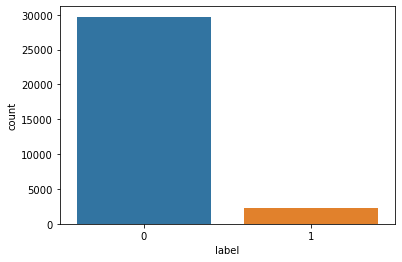

In [24]:
sns.countplot('label',data=train)

In [7]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
#number of stop words in each tweet
def stop(df):
    df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stopwords.words('english')]))
    print(df[['tweet','stopwords']].head())

In [15]:
stop(train)

                                               tweet  stopwords
0   @user when a father is dysfunctional and is s...         10
1  @user @user thanks for #lyft credit i can't us...          5
2                                bihday your majesty          1
3  #model   i love u take with u all the time in ...          5
4             factsguide: society now    #motivation          1


In [32]:
import string
#to remove punctuators and stopwords
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
#lower casing
def lower_case(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    print(df['tweet'].head())
lower_case(train)

0    @user when a father is dysfunctional and is so...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model i love u take with u all the time in ur...
4                  factsguide: society now #motivation
Name: tweet, dtype: object


In [34]:
def punctuation_removal(df):
    df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
    print(df['tweet'].head())
punctuation_removal(train)    

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in urð...
4                    factsguide society now motivation
Name: tweet, dtype: object


In [39]:
#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [41]:
def stemming(df):
    return df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
stemming(train)

0    user when a father is dysfunct and is so selfi...
1    user user thank for lyft credit i cant use cau...
2                                  bihday your majesti
3    model i love u take with u all the time in urð...
4                          factsguid societi now motiv
Name: tweet, dtype: object

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

In [37]:
pp1=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tf',TfidfTransformer()),
    ('classifer',MultinomialNB())
     ])

In [42]:
train['tweet']

0        user when a father is dysfunctional and is so ...
1        user user thanks for lyft credit i cant use ca...
2                                      bihday your majesty
3        model i love u take with u all the time in urð...
4                        factsguide society now motivation
                               ...                        
31957                   ate user isz that youuuðððððððððâï
31958    to see nina turner on the airwaves trying to w...
31959    listening to sad songs on a monday morning otw...
31960    user sikh temple vandalised in in calgary wso ...
31961                        thank you user for you follow
Name: tweet, Length: 31962, dtype: object

In [71]:
#for whole train data
pp1.fit(train['tweet'],train['label'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000020BBEA9C160>)),
                ('tf', TfidfTransformer()), ('classifer', MultinomialNB())])

In [44]:
#checking the accuracy for train data split
pp2=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tf',TfidfTransformer()),
    ('classifer',MultinomialNB())
     ])

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train['tweet'], train['label'], test_size=0.3, random_state=42)

In [47]:
pp2.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000020BBEA9C160>)),
                ('tf', TfidfTransformer()), ('classifer', MultinomialNB())])

In [48]:
predictions1=pp2.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
print(confusion_matrix(y_test,predictions1))
print('\n')
print(classification_report(y_test,predictions1))

[[8905    0]
 [ 594   90]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8905
           1       1.00      0.13      0.23       684

    accuracy                           0.94      9589
   macro avg       0.97      0.57      0.60      9589
weighted avg       0.94      0.94      0.92      9589



In [56]:
from sklearn import metrics
print('Accuracy for train data split:',metrics.accuracy_score(y_test,predictions1))

Accuracy for train data split: 0.9380540202315153


In [61]:
#for whole test data predictions 
test1=pd.read_csv('tweet_test.csv')
#test=test1#two test data holders

In [58]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [59]:
lower_case(test)

0    #studiolife #aislife #requires #passion #dedic...
1    @user #white #supremacists want everyone to se...
2    safe ways to heal your #acne!! #altwaystoheal ...
3    is the hp and the cursed child book up for res...
4    3rd #bihday to my amazing, hilarious #nephew e...
Name: tweet, dtype: object


In [62]:
punctuation_removal(test)

0    studiolife aislife requires passion dedication...
1    user white supremacists want everyone to see t...
2    safe ways to heal your acne altwaystoheal heal...
3    is the hp and the cursed child book up for res...
4    3rd bihday to my amazing hilarious nephew eli ...
Name: tweet, dtype: object


In [63]:
stemming(test)

0    studiolif aislif requir passion dedic willpow ...
1    user white supremacist want everyon to see the...
2    safe way to heal your acn altwaystoh healthi heal
3    is the hp and the curs child book up for reser...
4    3rd bihday to my amaz hilari nephew eli ahmir ...
Name: tweet, dtype: object

In [75]:
predictions=pp1.predict(test['tweet'])

In [82]:
result=pd.DataFrame(predictions,test1['tweet'])

In [83]:
result.head(50)

,0
tweet,
#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,0
@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,0
safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,0
"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",0
"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",0
choose to be :) #momtips,0
something inside me dies ð¦ð¿â¨ eyes ness #smokeyeyes #tired #lonely #sof #grungeâ¦,0
#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸â¤ï¸â¤ï¸â¤ï¸ #thanks#aleeee !!!,0
@user @user @user i will never understand why my dad left me when i was so young.... :/ #deep #inthefeels,0


In [91]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nltk>=3.1 in c:\users\chaku\appdata\local\programs\python\python38\lib\site-packages (from textblob) (3.5)



In [98]:
from textblob import TextBlob
def sentiment_analysis(df):
    df['sentiment'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
    return df[['tweet','sentiment']].head(50)

In [99]:
sentiment_analysis(test)

,tweet,sentiment
0,studiolife aislife requires passion dedication...,0.000000
1,user white supremacists want everyone to see t...,0.068182
2,safe ways to heal your acne altwaystoheal heal...,0.500000
3,is the hp and the cursed child book up for res...,0.500000
4,3rd bihday to my amazing hilarious nephew eli ...,0.366667
5,choose to be momtips,0.000000
6,something inside me dies ððâ eyes ness smokeye...,-0.250000
7,finishedtattooinkedinkloveitâï âïâïâïâï thanks...,0.000000
8,user user user i will never understand why my ...,0.033333
9,delicious food lovelife capetown mannaepicure ...,1.000000


In [ ]:
#value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment